# Rockets, rocket engines - Homework 1

### Imports

In [48]:
import json
import numpy as np
from scipy.optimize import fsolve
import matplotlib.pyplot as plt
import pandas as pd

In [49]:
with open('../data/import/data.json', 'r') as f:
    data = json.load(f)

## Task 1 - Characteristic velocity

In [50]:
m_0 = data['m_0']
m_evp = data['m_evp']
t_muk = data['t_muk']

m_flow_rate = (m_0 - m_evp) / t_muk

In [51]:
print(f"Mass flow rate = {m_flow_rate:.4f} kg/s")

Mass flow rate = 26.8500 kg/s


In [52]:
p_1 = data['p_1']
R = data['R']
t_1 = data['t_1']
k = data['k']

A_t = (m_flow_rate) / ((p_1) * np.sqrt(k / (R * t_1)) * np.pow( 2/(k + 1) , (k + 1) / (2 * (k - 1)) ))

In [53]:
print(f"Area of the throat = {A_t:.4f} m^2")

Area of the throat = 0.0056 m^2


In [54]:
characteristic_velocity =  ( p_1 * A_t ) / m_flow_rate

In [55]:
print(f"Characteristic velocity = {characteristic_velocity:.4f} m/s")

Characteristic velocity = 1465.6904 m/s


# Task 2 - throat characteristics

Geometric sizes

The mass flow rate and throat area was determined in the previous task.

In [56]:
d_t = np.sqrt(4 * A_t / np.pi)

In [57]:
print(f"Diameter of the throat = {d_t:.4f} m")

Diameter of the throat = 0.0846 m


Thermodynamic characteristics

Using Poisson's equations, we can determine the critical temperature vlaue measured in the cross-section of nozzle.

In [58]:
t_t = 2 * t_1 / (k + 1)

In [59]:
print(f"Temperature at the throat = {t_t:.4f} K")

Temperature at the throat = 2473.4389 K


Isentropic process pressure

In [60]:
p_t = p_1 * np.pow( (2 / (k + 1) ) , (k / (k - 1)) )

In [61]:
print(f"Isentropic process pressure = {p_t:.4f} Pa")

Isentropic process pressure = 3937755.2917 Pa


Density at throat

In [62]:
ro_t = p_t / (R * t_t)

In [63]:
print(f"Density at the throat = {ro_t:.4f} kg/m^3")

Density at the throat = 4.7872 kg/m^3


## Task 3 - exitation pressure and optimal height

Determining exitation Mach number

In [64]:
def expansion_ratio_eq(M, epsilon, k):
    term1 = 1 / M
    term2 = ((2 / (k + 1)) * (1 + ((k - 1)/2) * M**2))**((k + 1)/(2 * (k - 1)))
    return term1 * term2 - epsilon

def solve_exit_mach(epsilon, k, guess=3.0):
    M_e, = fsolve(expansion_ratio_eq, guess, args=(epsilon, k))
    return M_e

In [65]:
epsilon = data['epsilon']
M_e = solve_exit_mach(epsilon, k)
print(f"Exit Mach number = {M_e:.4f}")

Exit Mach number = 3.4373


In [66]:
p_2 = p_1 * (1 + ((k-1)/2) * M_e**2) **(-k/(k-1)) 

In [67]:
print(f"Pressure at the exit = {p_2:.4f} Pa")

Pressure at the exit = 67042.3800 Pa


In [68]:
p_0 = 101325
T_0 = 288.15 
L = 0.0065
g = 9.81
M_air = 0.02896
R_0 = 8.31446

In [69]:
h_opt = (T_0 / L) * (1 - (p_2 / p_0)**(R_0 * L / (g * M_air)))
print(f"Optimal height = {h_opt:.4f} m")


Optimal height = 3349.6154 m


## Task 4 - thrust and thrust factor

Area of the exit = 0.0675 m^2
Thrust at sea level = 62250.0000 N
Pressure = 67042.3800 Pa
Mass flow rate = 26.8500 kg/s
Effective exhaust velocity = 2404.5747 m/s


,Altitude [m],Thrust [kN],Thrust coefficient
0,0.000000,62.250000,1.581805
1,157.894737,62.377021,1.585032
2,315.789474,62.502125,1.588211
3,473.684211,62.625332,1.591342
4,631.578947,62.746666,1.594425
5,789.473684,62.866148,1.597461
6,947.368421,62.983799,1.600451
7,1105.263158,63.099642,1.603394
8,1263.157895,63.213697,1.606293
9,1421.052632,63.325987,1.609146


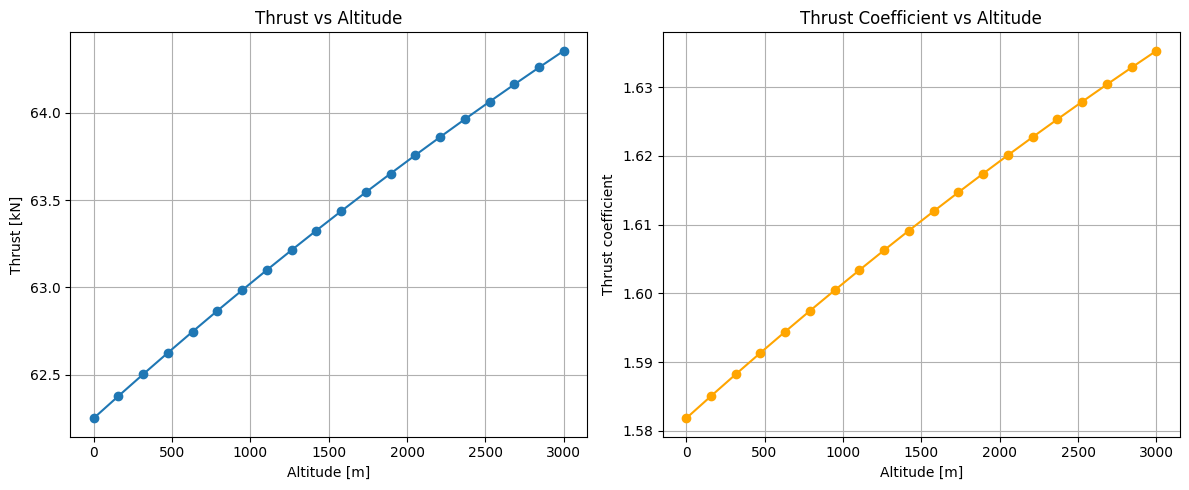

In [70]:
H_0 = data["H_0"]
H_evp = data["H_evp"]
heights = np.linspace(H_0, H_evp, 20)

A_2 = A_t * epsilon
F_t_h0 = data["F_t_h0"]
print(f"Area of the exit = {A_2:.4f} m^2")
print(f"Thrust at sea level = {F_t_h0:.4f} N")
print(f"Pressure = {p_2:.4f} Pa" )
print(f"Mass flow rate = {m_flow_rate:.4f} kg/s")

w = (F_t_h0 - (p_2 - p_0) * A_2) / m_flow_rate
print(f"Effective exhaust velocity = {w:.4f} m/s")

def p_at_height(h):
    return p_0 * (1 - L * h / T_0) ** (g * M_air / (R_0 * L))

thrusts = []
thrust_coeffs = []

for h in heights:
    p_current = p_at_height(h)
    thrust = m_flow_rate * w + (p_2 - p_current) * A_2
    c_f = thrust / (p_1 * A_t)
    thrusts.append(thrust/1000)
    thrust_coeffs.append(c_f)

df = pd.DataFrame({
    "Altitude [m]": heights,
    "Thrust [kN]": thrusts,
    "Thrust coefficient": thrust_coeffs
})

display(df)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(heights, thrusts, marker='o')
plt.xlabel("Altitude [m]")
plt.ylabel("Thrust [kN]")
plt.title("Thrust vs Altitude")
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(heights, thrust_coeffs, marker='o', color='orange')
plt.xlabel("Altitude [m]")
plt.ylabel("Thrust coefficient")
plt.title("Thrust Coefficient vs Altitude")
plt.grid(True)
plt.savefig("../doc/latex/images/plots.png")

plt.tight_layout()
plt.show()

In [71]:
df.to_csv('../data/df.csv', index=False)